In [1]:
##Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
###import the essential libraries
import pandas as pd
import numpy as np

In [3]:
###Read the dataset and checking the head
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
##Cheking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
##check the shape
df.shape

(25, 2)

In [6]:
df.isnull().sum() ##No null values

Hours     0
Scores    0
dtype: int64

# Visualising the data

In [7]:
#Importing the essential libraries
import matplotlib.pyplot as plt 
import seaborn as sns

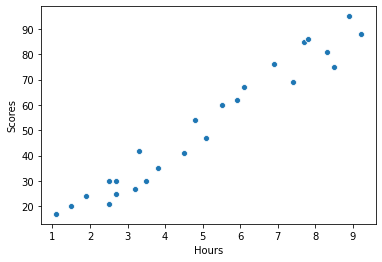

In [8]:
sns.scatterplot(data = df,x="Hours",y="Scores")
plt.show()

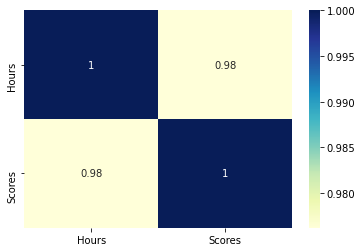

In [10]:
##Checking the correlation between the variables
sns.heatmap(df.corr(),cmap="YlGnBu", annot = True)
plt.show()

In [11]:
###Making the X(independent) and y(Dependent/Target) variable
X = df["Hours"]
y = df["Scores"]

## Model building using Sklearn 

In [12]:
###Test-Train split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [13]:
X_train.shape

(17,)

In [14]:
#As X-train and X-test is a pandas -series object ,converting them into numpy array 
X_train_lr = X_train.values.reshape(-1,1)
X_test_lr = X_test.values.reshape(-1,1)

In [16]:
##Importing LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #Instantiate
lr.fit(X_train_lr,y_train) #Fitting the model

LinearRegression()

In [17]:
###Checking the parameters
print(lr.coef_)
print(lr.intercept_)

[9.87171443]
1.495142109236383


In [18]:
###Checking the R-square value 
from sklearn.metrics import r2_score
print(r2_score(y_train,9.87171443*X_train + 1.495142109236383))

0.9570735354094693


So,our R-squared is coming around 96%,that means 96% of the variance in
Score is explain by our model

# So,the equation is Score = 9.87171443*X_train + 1.495142109236383

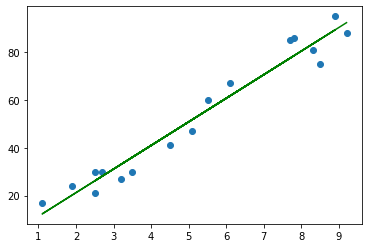

In [19]:
##Visualising the scatterplot along with the regression line
plt.scatter(X_train,y_train)
plt.plot(X_train,9.87171443*X_train + 1.495142109236383,'g')
plt.show()

# Now,Let's evaluate our model on the test set

In [21]:
y_test_pred = lr.predict(X_test_lr)
print(y_test_pred)

[28.14877107 39.00765694 34.07179972 59.73825724 16.30271375 74.54582888
 69.60997167 48.87937137]


In [22]:
##Now comparing the actual vs predicted values
pd.DataFrame({'Hours_Study':X_test,'Actual_Score':y_test,'Predicted_Score':y_test_pred})

,Hours_Study,Actual_Score,Predicted_Score
9,2.7,25,28.148771
22,3.8,35,39.007657
13,3.3,42,34.071800
11,5.9,62,59.738257
5,1.5,20,16.302714
19,7.4,69,74.545829
23,6.9,76,69.609972
21,4.8,54,48.879371


In [23]:
##Lets,check the r2_score on the test set also
r2_score(y_test,y_test_pred) 

0.9309458862687437

# Now,predicting the Score for 9.25 hours of study

In [24]:
hours = np.array([9.25])

In [25]:
hours = hours.reshape(-1,1)

In [26]:
Predicted_Score = lr.predict(hours)
print("No. of study hours = {}".format(hours[0][0]))
print("Predicted_Score = {}".format(Predicted_Score[0]))

No. of study hours = 9.25
Predicted_Score = 92.80850057353504
